Provides visualisations for index document lengths - pre stopword removal - as well as post stopword removal.

Also provides for visualisation of word distribution in collections and for stopword list overlaps. 

In [2]:
# import everything as needed
%matplotlib inline


from typing import List 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import cm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import csv
import re
import string
from matplotlib.artist import setp
import subprocess
import os
import copy

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')

#Set general plot properties
sns.set()
# sns.set_context("paper")
sns.set_color_codes("pastel")

sns.set_context({"figure.figsize": (16, 10)})
# plt.style.use('grayscale')
plt.style.use('seaborn-white')

In [3]:

def read_doc_len_file(path: str): 
    lens = []
    with open(path) as f: 
        for line in f:
            lens.append(int(line.strip()))
            
    return lens 


In [5]:
# These doc lens are generated from pre-stopped indices

root_path = "/home/danlocke/go/src/github.com/dan-locke/phd-data/generated"
dirs = ['aus', 'aus', 'sigir']

index_display_names = ('AUS', 'FILTERED', 'SIGIR')
index_names = ['flattened', 'filtered', 'sigir']
doc_lens = []
stopped_lens = []
stop_prefixes = ['prestop-']

for i in range(len(stop_prefixes)): 
    for in_name in index_names: 
        if i % 2 == 0:
            stopped_lens.append(read_doc_len_file(os.path.join(root_path, "{0}{1}-doc_lens.txt".format(stop_prefixes[i], in_name))))
        else:
            doc_lens.append(read_doc_len_file(os.path.join(root_path, "{0}{1}-doc_lens.txt".format(stop_prefixes[i], in_name))))

        
def plot_lens(lens, names):
    fig, axs = plt.subplots(1, len(lens))
    fig.set_size_inches(16, 8)
    for i in range(len(lens)):
        sns.distplot(lens[i], kde=False, ax=axs[i])
        axs[i].set_xticks([])
        axs[i].set_xlabel(names[i])

/home/danlocke/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


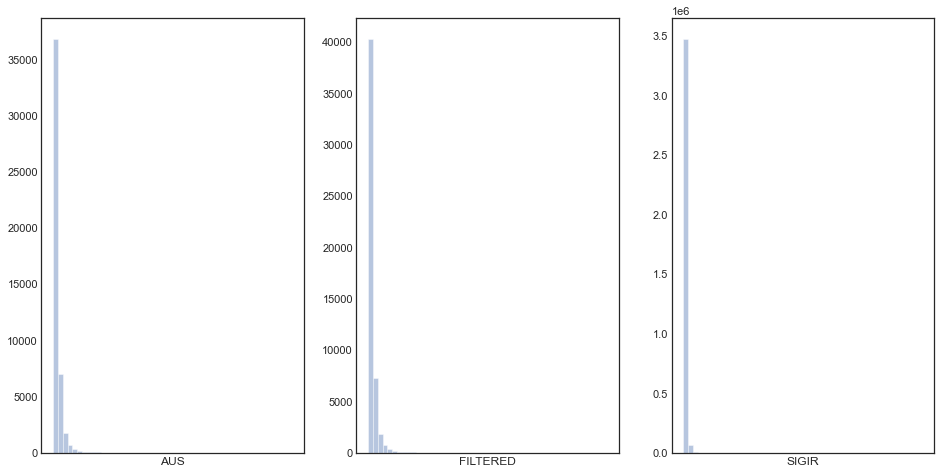

In [6]:
plot_lens(stopped_lens, index_display_names)

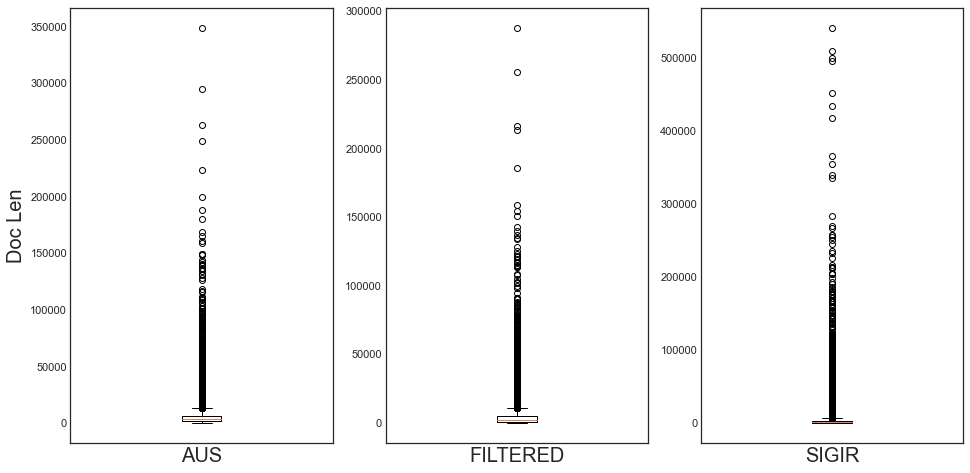

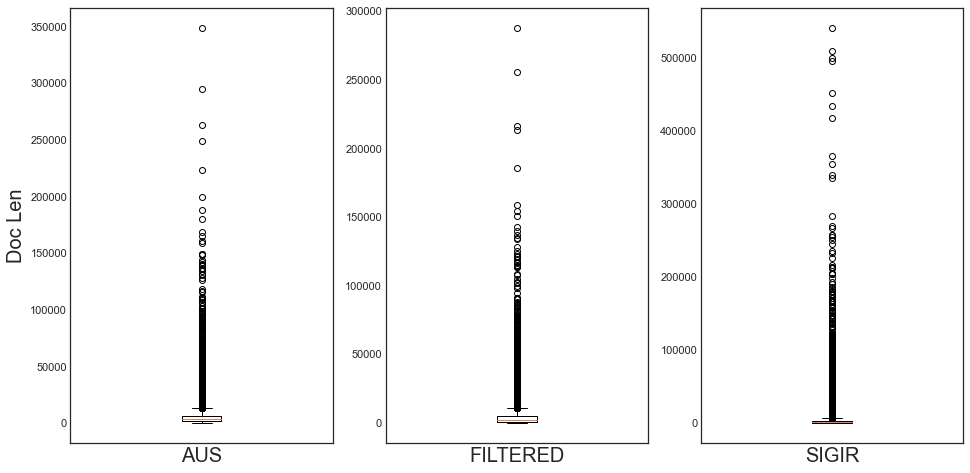

In [7]:
def plot_bar_whisker_lens(lens, names):
    fig, axs = plt.subplots(1, len(lens))
    fig.set_size_inches(16, 8)
    axs[0].set_ylabel('Doc Len', fontsize='20')
    for i in range(len(lens)):
        axs[i].boxplot(lens[i])
        axs[i].set_xticks([])
        axs[i].set_xlabel(names[i], fontsize='20')
        
    return fig 
        
plot_bar_whisker_lens(stopped_lens, index_display_names).savefig('doclens.png', bbox_inches = 'tight', pad_inches = 0.02)

In [8]:
# compute averages
def get_mean_len(lens):
    df = pd.DataFrame.from_dict({x: lens[i] for i, x in enumerate(index_names)}, orient='index')
    df = df.transpose()
    df.mean()
    return df.mean().to_latex()

In [9]:
print(get_mean_len(stopped_lens))

\begin{tabular}{lr}
\toprule
{} &            0 \\
\midrule
flattened &  5451.363299 \\
filtered  &  4247.470368 \\
sigir     &  2571.611014 \\
\bottomrule
\end{tabular}



In [12]:
# root_path = "/Users/danlocke/go/src/github.com/dan-locke/phd/experiments"

def read_countfile(path: str) -> pd.DataFrame: 
    words = []
    counts = []
    with open(path) as f: 
        for line in f:
            line = line.strip()
            parts = line.split()
            words.append(parts[0])
            counts.append(int(parts[1]))
            
    return pd.DataFrame({'words': words, 'counts': counts})
    
top_tokens = []
for i in index_names: 
    top_tokens.append(read_countfile(os.path.join(root_path, "{0}-top-tokens.txt".format(i))))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/danlocke/go/src/github.com/dan-locke/phd-data/generated/filtered-top-tokens.txt'

In [ ]:
def plot_top_tokens(tokens: List[pd.DataFrame], names, n: int): 
    fig, axs = plt.subplots(1, len(top_tokens))
    fig.set_size_inches(16, 8)
    axs[0].set_ylabel('Frequency', fontsize=20)
    for i in range(len(top_tokens)):
        axs[i].plot(top_tokens[i]['counts'][:n])
        axs[i].set_xticks([])
        axs[i].tick_params(labelsize=15)
        axs[i].set_xlabel(names[i], fontsize=20)
        
    return fig 
    

In [ ]:
plot_top_tokens(top_tokens, index_display_names, 100).savefig('top-tokens.png', bbox_inches = 'tight', pad_inches = 0.02)

In [20]:
top_tokens[2][:20]

IndexError: list index out of range

In [136]:
# jaccard overlap of stopword lists 

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [218]:
def read_wordfile(path: str) -> List[str]: 
    words = []
    with open(path) as f: 
        for line in f:
            words.append(line.strip())
            
    return words

qld_stop = read_wordfile(os.path.join(root_path, 'qld-stopwords.txt'))
ussc_stop = read_wordfile(os.path.join(root_path, 'us-stopwords.txt'))
sigir_stop = read_wordfile(os.path.join(root_path, 'sigir-stopwords.txt'))

In [219]:
jaccard_similarity(sigir_stop, ussc_stop)

0.5768115942028985

In [220]:
def missing(a: set, b: set):
    s_a = set(a)
    s_b = set(b)
    
    return s_a - s_b

In [248]:
# missing(sigir_stop, ussc_stop)

In [249]:
# missing(ussc_stop, sigir_stop)

In [250]:
# set(ussc_stop).intersection(set(sigir_stop))